In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px
import io 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [6]:
df = pd.read_csv(r'C:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder  #Changes categorical text data to numerical
from sklearn.preprocessing import OneHotEncoder # Changes cat to numerical only that its better -- check notes for difference
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error #
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestRegressor #
from sklearn.compose import ColumnTransformer
import warnings # suppresses pesky warnings??
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

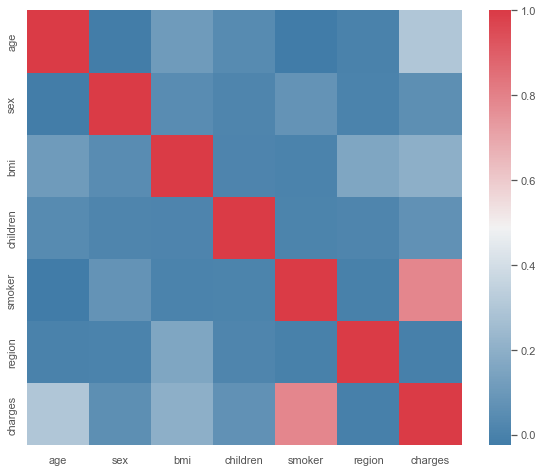

In [18]:
f, ax = plt.subplots(figsize=(10, 8))  
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

In [19]:
# 3.3.2 Choose Features and Target

#x = Features. We drop the columns we don't want.
x = df.drop(['region', 'sex', 'children', 'charges'], axis ='columns') 

#y = Target. In this case, charges.
y = df.charges 

print(x)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]


In [26]:
scaler = StandardScaler() # Create a scaler object
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)) 
print('scaling complete')
print('new values of array x (age, bmi, smoker)')
x

scaling complete
new values of array x (age, bmi, smoker)


array([[-1.43876426, -0.45332   ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.5074631 ],
       [-0.79795355,  0.38330685, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.97058663]])

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print('splitting complete')

splitting complete


LINEAR REG

In [28]:
# Train a linear regression model
linreg = LinearRegression()
linreg.fit(x_train,y_train) # The actual training step
print('3 feature regression training is complete')

3 feature regression training is complete


In [29]:
y_pred = linreg.predict(x_test)
print('3 feature model has been appplied to test data')

3 feature model has been appplied to test data


In [31]:
print(f'R-squared: {r2_score(y_true=y_test, y_pred=y_pred):.3}')

R-squared: 0.787


LOG REG

In [25]:
# # Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(x_train, y_train)
# y_pred = log_reg.predict(x_test)
# print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

In [32]:
# 3.3.2 Choose Features and Target

#x = Features. We drop the columns we don't want.
X = df.drop(['charges'], axis ='columns') 

#y = Target. In this case, charges.
y = df.charges 

print(x)

[[-1.43876426 -0.45332     1.97058663]
 [-1.50996545  0.5096211  -0.5074631 ]
 [-0.79795355  0.38330685 -0.5074631 ]
 ...
 [-1.50996545  1.0148781  -0.5074631 ]
 [-1.29636188 -0.79781341 -0.5074631 ]
 [ 1.55168573 -0.26138796  1.97058663]]


In [42]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','bmi', 'children']),   # All the categorical columns
    ("cat", OrdinalEncoder(), ['sex', 'smoker', 'region']) ]) # All the non-categorical columns
x = pd.DataFrame(full_pipeline.fit_transform(X))
y = df["charges"] # pick the last column

print('regression x and y assigned')

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [39]:
scaler = StandardScaler() # Create a scaler object
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
print('scaling complete') 

scaling complete


In [40]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print('splitting complete')

splitting complete


In [ ]:
df.to_csv('testlogreg.csv')

In [16]:
features = df.drop(["charges"], axis=1)

print('features isolated')

features isolated


In [35]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','bmi', 'children']),   # All the categorical columns
    ("cat", OrdinalEncoder(), ['sex', 'smoker', 'region']) ]) # All the non-categorical columns
x = pd.DataFrame(full_pipeline.fit_transform(features))
y = df["charges"] # pick the last column

print('regression x and y assigned')

regression x and y assigned


In [30]:
TEST_SIZE = 0.3
RANDOM_STATE = 0 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE ,random_state=RANDOM_STATE )

print('Splitting complete')

Splitting complete


In [33]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

ValueError: Unknown label type: 'continuous'

In [ ]:
# num_val = df.select_dtypes(include=['int64', 'float64'])
# num_val.info()

In [ ]:
# cat_val = df.select_dtypes(exclude=['int64', 'float64'])
# cat_val.info()

In [ ]:
# le = LabelEncoder()
# # ne = le.fit(df.columns)

In [ ]:
# #Label Encode a single Column
# le.fit(df.sex)
# df.sex = le.transform(df.sex)

In [13]:
# #Label Encode All categorical columns
# col = df.select_dtypes(exclude=['int64', 'float64'])

# col

In [ ]:
# cat_val = ['sex', 'smoker', 'region']
# df[cat_val] = df[cat_val].apply(LabelEncoder().fit_transform)

In [12]:
# df

In [ ]:
# y_data = df['charges']
# features = df.drop(['charges'], axis=1)


In [ ]:
# y = df['charges']
# x = df.drop(['charges'], axis=1)

In [ ]:
# x_train, x_test_data, y_train, y_test_data = train_test_split(x, y, test_size=0.3)

In [11]:
# df.head(1)

In [ ]:

# new_pipeline = ColumnTransformer([ 
#     ('num', StandardScaler(), ['age', 'bmi', 'children']),
#     ('cat', OrdinalEncoder(), ['sex', 'smoker', 'region'])
# ])

In [ ]:
# model = LogisticRegression()

In [10]:
# model.fit(x_train, y_train)